In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('Data/human.csv', header=0, low_memory=False)

In [3]:
# drop Unnamed columns
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [4]:
data.sample(5)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
63339,<35,No,Undergraduate,1,Man,No,Dev,6,1,India,7738.0,C#;C++;Java;Angular;Angular.js;Django;Node.js;...,12,1
43323,<35,No,PhD,1,Man,No,NotDev,14,8,Italy,47990.0,Bash/Shell;JavaScript;Python;SQL;Docker;Flask;...,7,0
68137,>35,No,Master,1,Man,No,NotDev,15,8,Germany,60787.0,Bash/Shell;C#;Delphi;Go;Java;PHP;PowerShell;Py...,19,1
4756,<35,No,Undergraduate,1,Man,No,Dev,6,2,Australia,43426.0,C++;JavaScript;PHP;Docker;Kubernetes;Laravel;R...,14,0
2746,<35,No,Undergraduate,1,Man,No,Dev,7,3,United States of America,120000.0,Bash/Shell;Go;HTML/CSS;JavaScript;PowerShell;P...,19,0


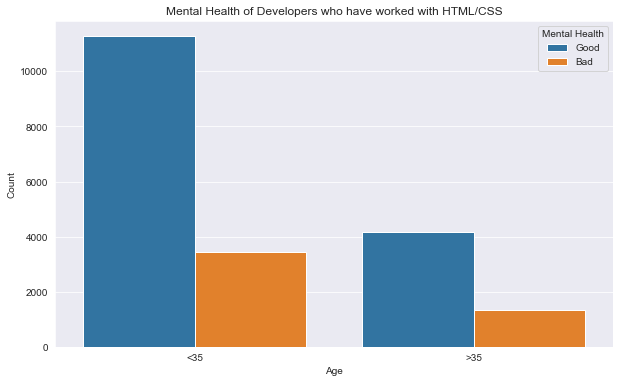

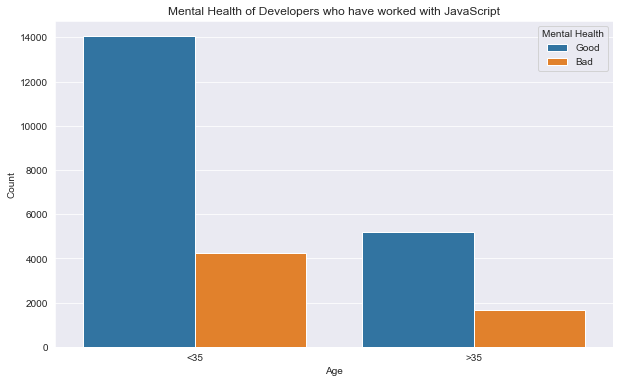

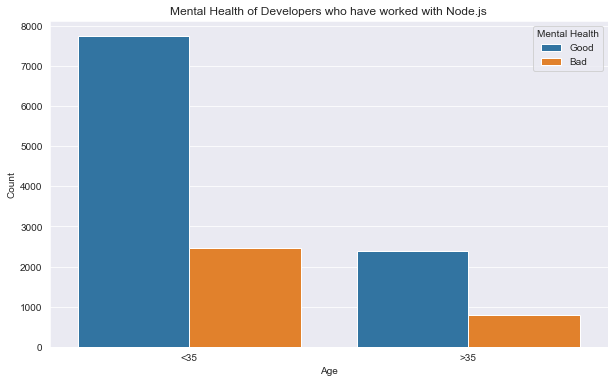

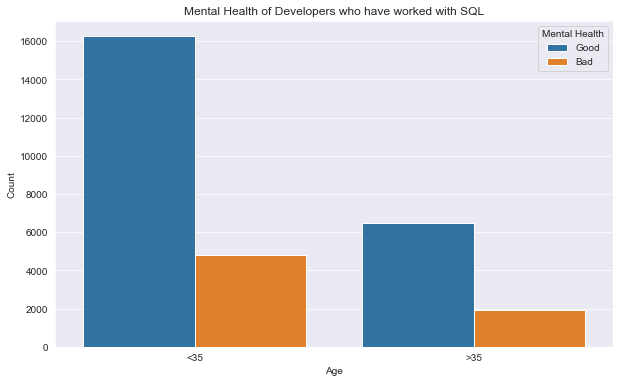

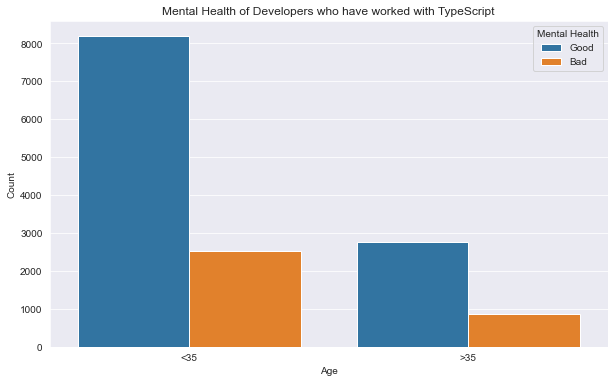

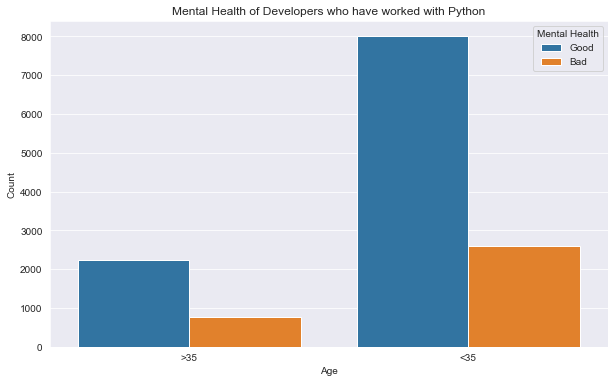

In [5]:
import seaborn as sns

# Filter the data for HTML/CSS
filtered_data_html_css = data[(data['EdLevel'] == 'Undergraduate') & (data['MainBranch'] == 'Dev') & (data['HaveWorkedWith'].str.contains('HTML/CSS'))]

# Plot the graph for HTML/CSS
plt.figure(figsize=(10,6))
sns.countplot(x='Age', data=filtered_data_html_css, hue='MentalHealth')
plt.title('Mental Health of Developers who have worked with HTML/CSS')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Mental Health', labels=['Good', 'Bad'])
plt.show()

# Filter the data for JavaScript
filtered_data_javascript = data[(data['EdLevel'] == 'Undergraduate') & (data['MainBranch'] == 'Dev') & (data['HaveWorkedWith'].str.contains('JavaScript'))]

# Plot the graph for JavaScript
plt.figure(figsize=(10,6))
sns.countplot(x='Age', data=filtered_data_javascript, hue='MentalHealth')
plt.title('Mental Health of Developers who have worked with JavaScript')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Mental Health', labels=['Good', 'Bad'])
plt.show()

# Filter the data for Node.js
filtered_data_node_js = data[(data['EdLevel'] == 'Undergraduate') & (data['MainBranch'] == 'Dev') & (data['HaveWorkedWith'].str.contains('Node.js'))]

# Plot the graph for Node.js
plt.figure(figsize=(10,6))
sns.countplot(x='Age', data=filtered_data_node_js, hue='MentalHealth')
plt.title('Mental Health of Developers who have worked with Node.js')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Mental Health', labels=['Good', 'Bad'])
plt.show()

# Filter the data for SQL
filtered_data_sql = data[(data['EdLevel'] == 'Undergraduate') & (data['MainBranch'] == 'Dev') & (data['HaveWorkedWith'].str.contains('SQL'))]

# Plot the graph for SQL
plt.figure(figsize=(10,6))
sns.countplot(x='Age', data=filtered_data_sql, hue='MentalHealth')
plt.title('Mental Health of Developers who have worked with SQL')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Mental Health', labels=['Good', 'Bad'])
plt.show()

# Filter the data for TypeScript
filtered_data_typescript = data[(data['EdLevel'] == 'Undergraduate') & (data['MainBranch'] == 'Dev') & (data['HaveWorkedWith'].str.contains('TypeScript'))]

# Plot the graph for TypeScript
plt.figure(figsize=(10,6))
sns.countplot(x='Age', data=filtered_data_typescript, hue='MentalHealth')
plt.title('Mental Health of Developers who have worked with TypeScript')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Mental Health', labels=['Good', 'Bad'])
plt.show()

# Filter the data for Python
filtered_data_python = data[(data['EdLevel'] == 'Undergraduate') & (data['MainBranch'] == 'Dev') & (data['HaveWorkedWith'].str.contains('Python'))]

# Plot the graph for Python
plt.figure(figsize=(10,6))
sns.countplot(x='Age', data=filtered_data_python, hue='MentalHealth')
plt.title('Mental Health of Developers who have worked with Python')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Mental Health', labels=['Good', 'Bad'])
plt.show()

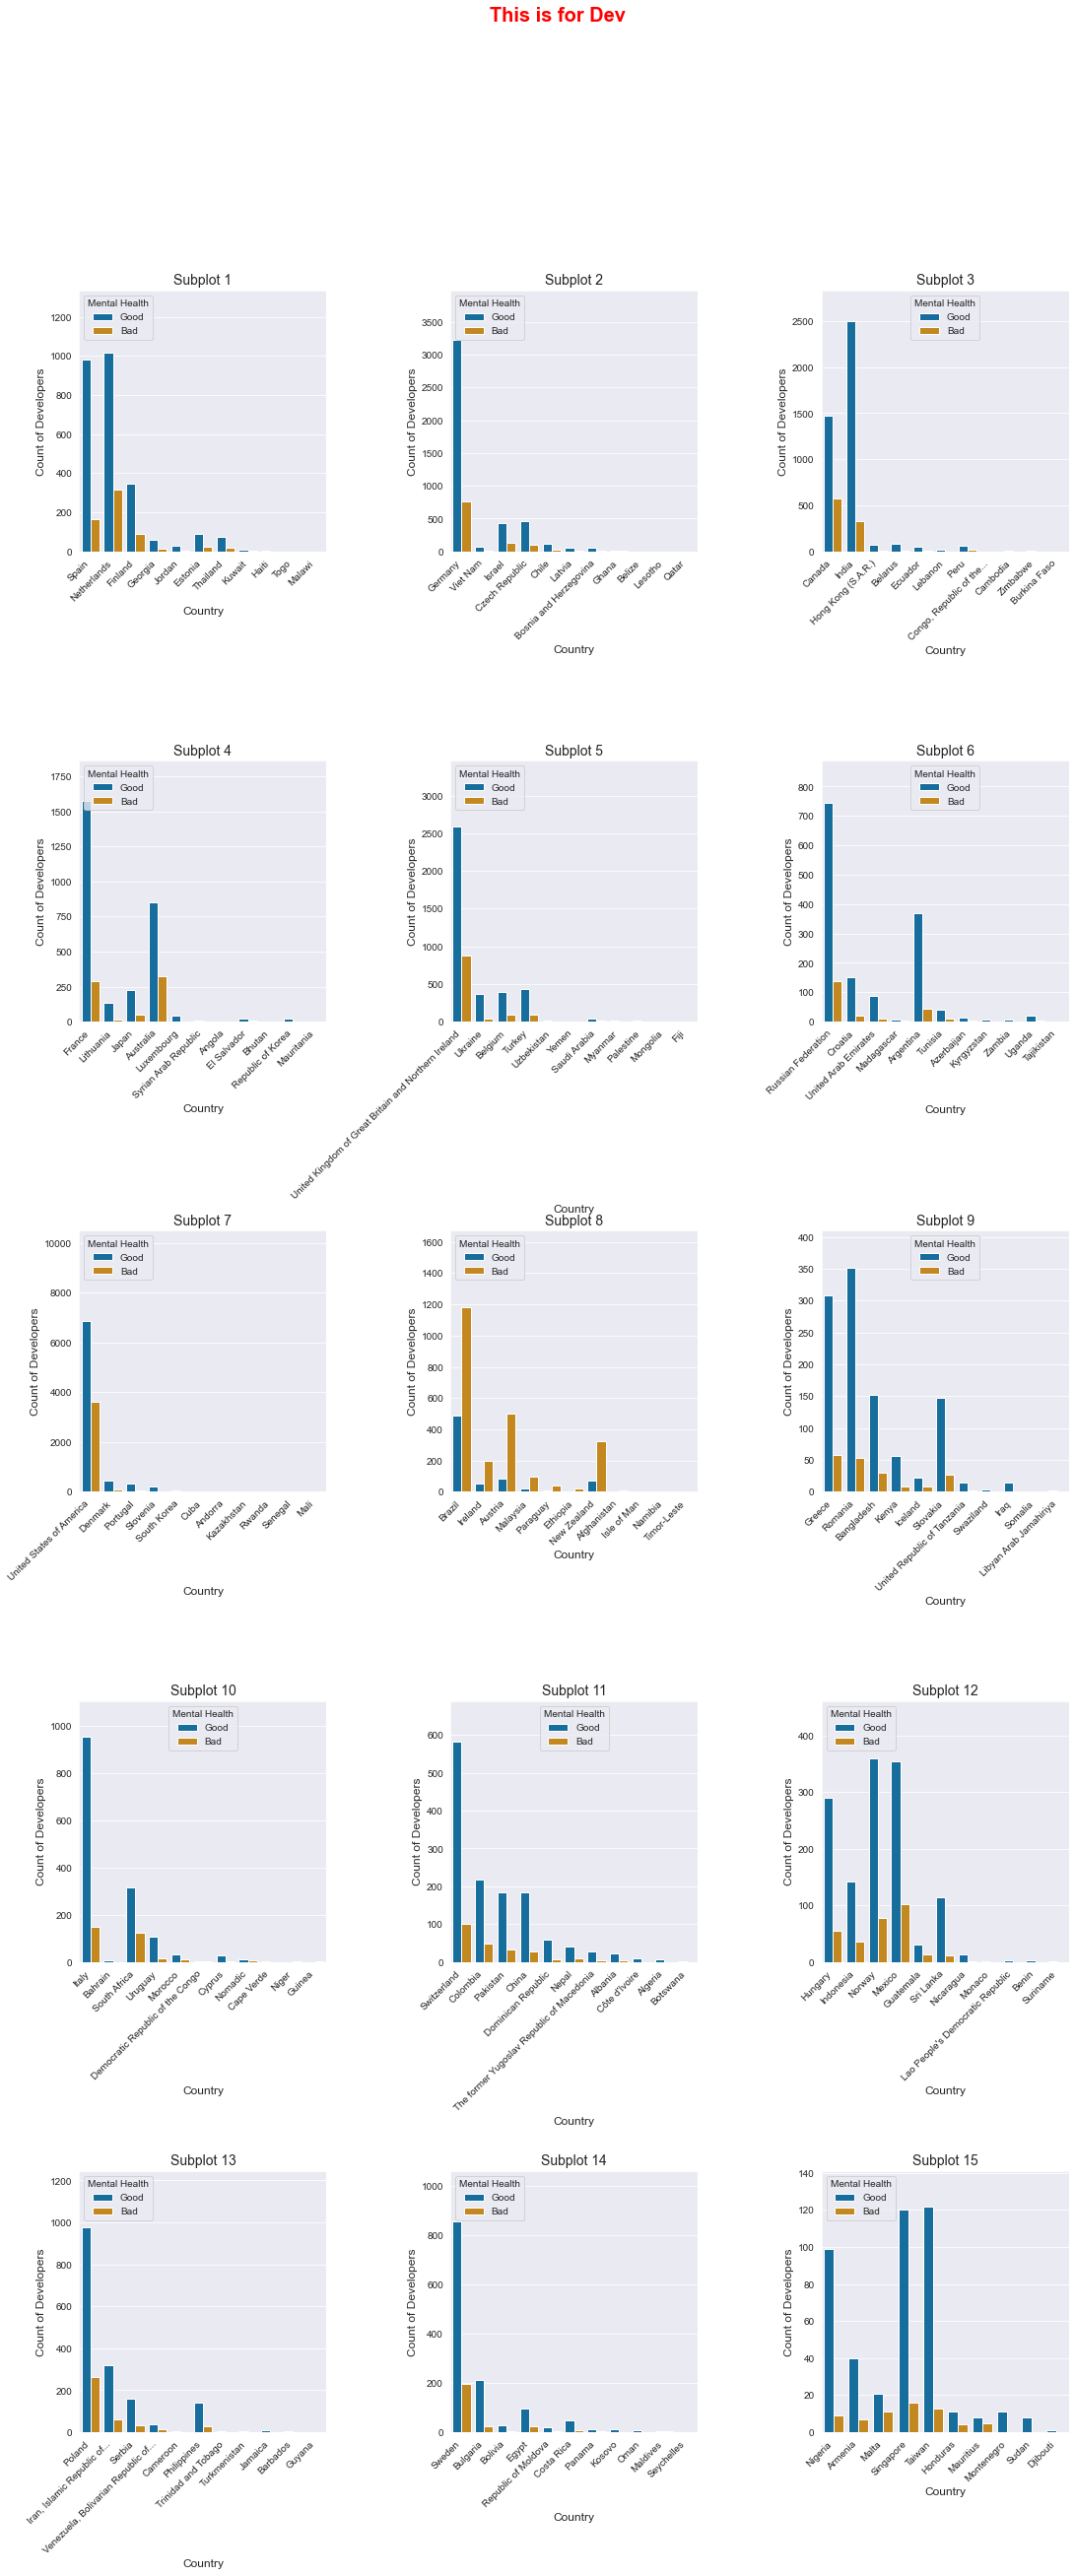

In [6]:
# Filter data for Developers with more than 7 years of coding experience
filtered_data_dev = data.query("MainBranch == 'Dev' and YearsCode > 7")

# Get a list of unique countries in the filtered data
unique_countries = filtered_data_dev['Country'].unique()

# Define the number of subplots and their configuration
num_subplots = min(len(unique_countries), 15)
subplots_per_row = 3
num_rows = (num_subplots + subplots_per_row - 1) // subplots_per_row

# Initialize the figure with the defined size and spacing
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(18, num_rows * 8))
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Set the main title for the figure
fig.suptitle('This is for Dev', fontsize=20, color='red', fontweight='bold', ha='center')

# Create subplots for each group of countries
for i, ax in enumerate(axes.flatten()):
    if i >= num_subplots:
        ax.remove()  # Remove unused axes
        continue

    countries_subset = unique_countries[i::num_subplots]
    filtered_subset = filtered_data_dev[filtered_data_dev['Country'].isin(countries_subset)]

    # Create the countplot with a visually appealing palette
    sns.countplot(x='Country', data=filtered_subset, hue='MentalHealth', ax=ax, palette="colorblind")

    # Set the title and labels for each subplot
    ax.set_title(f'Subplot {i + 1}', fontsize=14)
    ax.set_xlabel('Country', fontsize=12)
    ax.set_ylabel('Count of Developers', fontsize=12)

    # Customize the Y-axis limit for readability
    ax.set_ylim(0, filtered_subset['Country'].value_counts().max() + 5)

    # Rotate X-axis labels for better visibility
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Add a legend with clear labels
    ax.legend(title='Mental Health', labels=['Good', 'Bad'], fontsize=10)

# Show the subplots
plt.show()

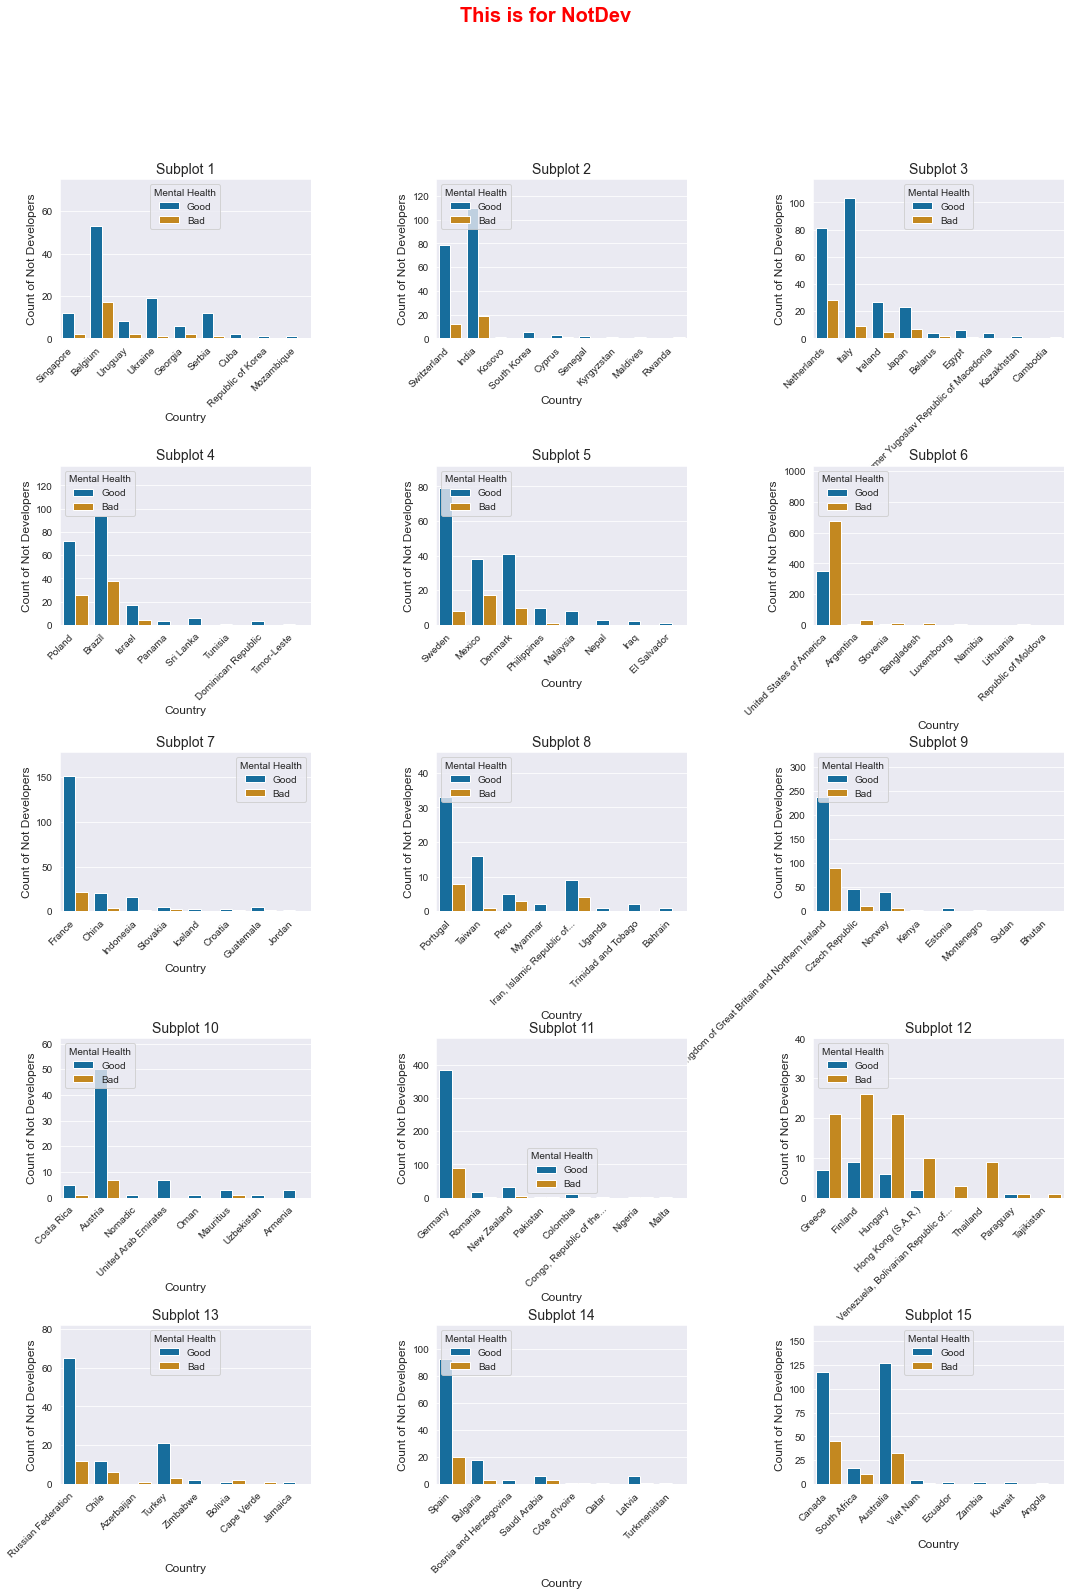

In [7]:
# Filter data for Not Developers with more than 7 years of coding experience
filtered_data_not_dev = data.query("MainBranch == 'NotDev' and YearsCode > 7")

# Get a list of unique countries in the filtered data
unique_countries = filtered_data_not_dev['Country'].unique()

# Define the number of subplots and their configuration
num_subplots = 15
subplots_per_row = 3
num_rows = -(-num_subplots // subplots_per_row)  # Ceiling division

# Initialize the figure with the defined size and spacing
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(18, 24))
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Set the main title for the figure
fig.suptitle('This is for NotDev', fontsize=20, color='red', fontweight='bold', ha='center')

# Create subplots for each group of countries
for i, ax in enumerate(axes.flatten()):
    if i >= num_subplots:
        ax.remove()  # Remove unused axes
        continue

    countries_subset = unique_countries[i::num_subplots]
    filtered_subset = filtered_data_not_dev[filtered_data_not_dev['Country'].isin(countries_subset)]

    # Create the countplot with a visually appealing palette
    sns.countplot(x='Country', data=filtered_subset, hue='MentalHealth', ax=ax, palette="colorblind")

    # Set the title and labels for each subplot
    ax.set_title(f'Subplot {i + 1}', fontsize=14)
    ax.set_xlabel('Country', fontsize=12)
    ax.set_ylabel('Count of Not Developers', fontsize=12)

    # Customize the Y-axis limit for readability
    ax.set_ylim(0, filtered_subset['Country'].value_counts().max() + 5)

    # Rotate X-axis labels for better visibility
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Add a legend with clear labels
    ax.legend(title='Mental Health', labels=['Good', 'Bad'], fontsize=10)

# Show the subplots
plt.show()

## Getting the data that will be used for the analysis

In [8]:
# model_data = Age, EdLevel, YearsCodePro, Country, HaveWorkedWith, Employed
model_data = data[['Age', 'EdLevel', 'YearsCodePro', 'Country', 'HaveWorkedWith', 'Employed']]

In [9]:
model_data.sample(5)

,Age,EdLevel,YearsCodePro,Country,HaveWorkedWith,Employed
23655,>35,NoHigherEd,28,Czech Republic,Dart;Elixir;HTML/CSS;JavaScript;Ruby;SQL;Ansib...,0
8585,>35,Undergraduate,11,United States of America,Java;JavaScript;Python;SQL;Docker;Git;Spring;A...,0
5905,<35,Undergraduate,5,Slovakia,Bash/Shell;C#;HTML/CSS;JavaScript;Node.js;Powe...,1
24505,<35,Master,7,France,HTML/CSS;JavaScript;Node.js;TypeScript;Docker;...,1
33880,<35,Master,7,Thailand,Bash/Shell;Dart;Go;JavaScript;Node.js;SQL;Dock...,0


In [10]:
# show the number of null values in each column
model_data.isnull().sum()

Age                0
EdLevel            0
YearsCodePro       0
Country            0
HaveWorkedWith    63
Employed           0
dtype: int64

In [11]:
# drop all colums when HaveWorkedWith is null
model_data = model_data.dropna(subset=['HaveWorkedWith'])

In [12]:
model_data.isnull().sum()

Age               0
EdLevel           0
YearsCodePro      0
Country           0
HaveWorkedWith    0
Employed          0
dtype: int64

In [13]:
# show total rows in each columns in the dataset
model_data.count()

Age               73399
EdLevel           73399
YearsCodePro      73399
Country           73399
HaveWorkedWith    73399
Employed          73399
dtype: int64

In [14]:
# Count total NaN in each column of a DataFrame
null_counts = model_data.isnull().sum()

# Print the null_counts to see the null values in each column
print(null_counts)

Age               0
EdLevel           0
YearsCodePro      0
Country           0
HaveWorkedWith    0
Employed          0
dtype: int64


In [15]:
# Get the data type of each column
data_types = model_data.dtypes

# Print the data types
print(data_types)

Age               object
EdLevel           object
YearsCodePro       int64
Country           object
HaveWorkedWith    object
Employed           int64
dtype: object


In [16]:
# Define a function to convert age
def convert_age(age):
    if age == '<35':
        return 0
    elif age == '>35':
        return 1

# Apply the function to the 'Age' column
model_data['Age'] = model_data['Age'].apply(convert_age)

In [17]:
# Get all unique values in 'EdLevel' column
unique_edlevel_values = model_data['EdLevel'].unique()

# Print the unique values
print(unique_edlevel_values)

['Master' 'Undergraduate' 'PhD' 'Other' 'NoHigherEd']


In [18]:
# Define a function to convert EdLevel
def convert_edlevel(edlevel):
    if edlevel == 'NoHigherEd':
        return 0
    elif edlevel == 'Other':
        return 1
    elif edlevel == 'Undergraduate':
        return 2
    elif edlevel == 'Master':
        return 3

# Apply the function to the 'EdLevel' column
model_data['EdLevel'] = model_data['EdLevel'].apply(convert_edlevel)

In [19]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit and transform the 'Country' column
model_data['Country'] = le.fit_transform(model_data['Country'])

In [20]:
# show datatypes of all columns
model_data.dtypes

Age                 int64
EdLevel           float64
YearsCodePro        int64
Country             int32
HaveWorkedWith     object
Employed            int64
dtype: object

In [21]:
# Create a set of unique technologies excluding 'Git'
unique_technologies = set(model_data['HaveWorkedWith'].str.split(';', expand=True).stack().unique()) - {'Git'}

# Remove all NaN values from the model_data
model_data.dropna(inplace=True)

# Filter the 'HaveWorkedWith' column based on the unique_technologies set
model_data['HaveWorkedWith'] = model_data['HaveWorkedWith'].apply(lambda x: ';'.join(tech for tech in x.split(';') if tech in unique_technologies))

In [22]:
model_data.sample(5)

,Age,EdLevel,YearsCodePro,Country,HaveWorkedWith,Employed
26073,0,2.0,6,27,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,1
49617,0,2.0,6,65,HTML/CSS;Java;JavaScript;PHP;Python;Ansible;np...,1
52288,1,1.0,20,31,Dart;HTML/CSS;JavaScript;PHP;TypeScript;npm;Nu...,1
5312,1,0.0,22,54,Bash/Shell;Groovy;HTML/CSS;Java;JavaScript;PHP...,1
27212,0,2.0,7,164,Bash/Shell;C#;HTML/CSS;Java;JavaScript;Kotlin;...,1


In [23]:
from sklearn.preprocessing import MultiLabelBinarizer

# Create MultiLabelBinarizer object
mlb = MultiLabelBinarizer()

# Convert 'HaveWorkedWith' column into list of technologies
technologies = model_data['HaveWorkedWith'].str.split(';').tolist()

# Transform the 'HaveWorkedWith' column into binary values
binary_tech_matrix = mlb.fit_transform(technologies)

# Create a DataFrame from the binary matrix
tech_df = pd.DataFrame(binary_tech_matrix, columns=mlb.classes_, index=model_data.index)

# Drop the original 'HaveWorkedWith' column to save memory
model_data.drop('HaveWorkedWith', axis=1, inplace=True)

# Join the new binary technology DataFrame to the original model_data DataFrame
model_data = model_data.join(tech_df)

In [24]:
model_data.sample(5)

,Age,EdLevel,YearsCodePro,Country,Employed,,APL,ASP.NET,ASP.NET Core,AWS,...,TypeScript,Unity 3D,Unreal Engine,VBA,VMware,Vue.js,Xamarin,Yarn,jQuery,npm
46352,0,2.0,3,162,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
19744,1,2.0,16,162,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
53193,0,2.0,3,157,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
54389,0,3.0,4,51,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
11749,0,1.0,6,67,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split

# Define the target variable and the feature variables
X = model_data.drop('Employed', axis=1)
y = model_data['Employed']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model with increased max_iter
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
y_pred = logreg.predict(X_test)

print("X_test: \n", X_test)
print("X_predict: \n", logreg.predict(X_test))
print("y_test: \n", y_test)
print("y_predict: \n", y_pred)

X_test: 
        Age  EdLevel  YearsCodePro  Country     APL  ASP.NET  ASP.NET Core   \
2297     0      2.0             5      112  0    0        0              0   
18144    0      2.0             3      157  0    0        1              1   
16181    0      2.0            10       87  0    0        0              1   
18677    1      2.0            25       74  0    0        0              0   
14156    0      2.0             3       56  0    0        1              0   
...    ...      ...           ...      ... ..  ...      ...            ...   
67382    0      3.0             2       72  0    0        0              0   
18878    1      1.0            19       27  0    0        0              0   
15463    1      3.0            15       27  0    0        0              0   
44732    0      3.0            11      133  0    0        0              0   
48504    1      2.0            10       65  0    0        1              1   

       AWS  Angular  ...  TypeScript  Unity 3D  Unrea

In [28]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score on test set
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy score of the model: ", accuracy)
print("Prediction score in percentage: ", accuracy * 100, "%")

Accuracy score of the model:  1.0
Prediction score in percentage:  100.0 %


In [29]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(logreg)

# Save the model as a pickle in a file
with open('human.pkl', 'wb') as file:
    pickle.dump(logreg, file)